In [36]:
# I'm importing all the necessary libraries for this exercise.
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

In [2]:
# Here, I'm loading the Fashion-MNIST dataset, which is split into training and testing sets.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# I need to preprocess the data.
# First, I'm reshaping the images to 28x28x1 because my CNN expects a channel dimension.
# Then, I'm normalizing the pixel values from 0-255 to a 0-1 range. This helps the model learn faster.
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

In [4]:
# I'm converting the numerical labels (0-9) into a one-hot encoded format.
# This is necessary for my model's final layer, which uses softmax for multi-class classification.
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
# Finally, I'm just printing the shape of the data to confirm it's ready.
print("My training data shape is now:", x_train.shape)
print("My test data shape is now:", x_test.shape)

My training data shape is now: (60000, 28, 28, 1)
My test data shape is now: (10000, 28, 28, 1)


In [6]:
# Here, I'm building my first simple CNN model using the recommended practice.
baseline_model = Sequential([
    # I'm explicitly defining the input shape of my model as the first layer.
    tf.keras.Input(shape=(28, 28, 1)),
    
    # This is my first convolutional layer. I no longer need to specify the input_shape here.
    Conv2D(32, (3, 3), activation='relu'),
    
    # A max pooling layer to reduce the size of the feature maps, making the model more efficient.
    MaxPooling2D((2, 2)),
    # I'm flattening the 2D feature maps into a 1D vector to feed into the dense layers.
    Flatten(),
    # A dense layer with 100 neurons for learning higher-level patterns.
    Dense(100, activation='relu'),
    # This is the final output layer. It has 10 neurons (one for each class) and uses softmax
    # to give me the probability for each class.
    Dense(10, activation='softmax')
])

2025-09-15 20:21:47.232206: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
# I'm compiling the compressed model.
baseline_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [8]:
# I'm printing a summary of the model to see its architecture and number of parameters.
baseline_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Now, I'm training the baseline model. I'm also measuring the time it takes.
start_time = time.time()
baseline_history = baseline_model.fit(x_train, y_train,
                                      epochs=10,
                                      batch_size=64,
                                      validation_split=0.2) # I'm using 20% of the training data for validation.
end_time = time.time()
baseline_training_time = end_time - start_time

print(f"\nMy baseline model took {baseline_training_time:.2f} seconds to train.")

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8441 - loss: 0.4399 - val_accuracy: 0.8788 - val_loss: 0.3360
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8946 - loss: 0.2935 - val_accuracy: 0.8969 - val_loss: 0.2921
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9087 - loss: 0.2522 - val_accuracy: 0.9075 - val_loss: 0.2647
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9191 - loss: 0.2217 - val_accuracy: 0.9080 - val_loss: 0.2607
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9290 - loss: 0.1954 - val_accuracy: 0.9113 - val_loss: 0.2505
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9347 - loss: 0.1763 - val_accuracy: 0.9121 - val_loss: 0.2517
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9421 - loss: 0.1584 - val_accuracy: 0.9124 - val_loss: 0.2594
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9490 - loss: 0.1404 - val_accuracy: 0

In [10]:
# After training, I'm evaluating the model on the test data to see how well it performs.
baseline_loss, baseline_accuracy = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f"My baseline test accuracy is: {baseline_accuracy * 100:.2f}%")

My baseline test accuracy is: 90.87%


In [11]:
# This is my first attempt at a hyperparameter-tuned model.
tuned_model_1 = Sequential([
    # I'm adding a dedicated Input layer at the beginning as recommended.
    # This clearly states that my model expects 28x28x1 images.
    tf.keras.Input(shape=(28, 28, 1)),

    # Now, I remove the input_shape from the Conv2D layer itself.
    # I increased the number of filters from 32 to 64 to allow the model to learn more features.
    Conv2D(64, (3, 3), activation='relu'),

    MaxPooling2D((2, 2)),
    Flatten(),
    # I also increased the neurons in the dense layer to 128.
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [12]:
# I'm compiling this model just like the baseline.
tuned_model_1.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [13]:
# For this version, I'm training with a smaller batch size of 32.
tuned_history_1 = tuned_model_1.fit(x_train, y_train,
                                    epochs=10,
                                    batch_size=32,
                                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8575 - loss: 0.3991 - val_accuracy: 0.8886 - val_loss: 0.3088
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9025 - loss: 0.2701 - val_accuracy: 0.8988 - val_loss: 0.2740
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9174 - loss: 0.2237 - val_accuracy: 0.9066 - val_loss: 0.2504
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9306 - loss: 0.1867 - val_accuracy: 0.9074 - val_loss: 0.2598
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9414 - loss: 0.1584 - val_accuracy: 0.9101 - val_loss: 0.2533
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9499 - loss: 0.1333 - val_accuracy: 0.9133 - val_loss: 0.2568
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9597 - loss: 0.1096 - val_accuracy: 0.9131 - val_loss: 0.2763
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9648 -

In [14]:
# Finally, I'm evaluating this tuned model to see if it's better than the baseline.
tuned_loss_1, tuned_accuracy_1 = tuned_model_1.evaluate(x_test, y_test, verbose=0)
print(f"\nMy first tuned model's test accuracy is: {tuned_accuracy_1 * 100:.2f}%")


My first tuned model's test accuracy is: 91.54%


In [15]:
# This is my second hyperparameter-tuned model.
tuned_model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    # I added a second Conv2D and MaxPooling2D layer to make the model deeper.
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/home/nashtech/jupyter-env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# I decided to experiment with a different learning rate for the Adam optimizer.
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005) # Slower learning rate.

In [17]:
# I'm compiling the model with my custom optimizer.
tuned_model_2.compile(optimizer=optimizer,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [18]:
# I'm training this deeper model.
tuned_history_2 = tuned_model_2.fit(x_train, y_train,
                                    epochs=10,
                                    batch_size=64,
                                    validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7924 - loss: 0.5827 - val_accuracy: 0.8452 - val_loss: 0.4264
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8662 - loss: 0.3773 - val_accuracy: 0.8704 - val_loss: 0.3630
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8816 - loss: 0.3302 - val_accuracy: 0.8802 - val_loss: 0.3322
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8918 - loss: 0.3008 - val_accuracy: 0.8924 - val_loss: 0.2986
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8991 - loss: 0.2780 - val_accuracy: 0.8922 - val_loss: 0.3026
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9049 - loss: 0.2609 - val_accuracy: 0.8986 - val_loss: 0.2815
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9109 - loss: 0.2420 - val_accuracy: 0.8971 - val_loss: 0.2804
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9161 - loss: 0.2279 - 

In [19]:
# And now I'm evaluating it to compare its performance.
tuned_loss_2, tuned_accuracy_2 = tuned_model_2.evaluate(x_test, y_test, verbose=0)
print(f"\nMy second tuned model's test accuracy is: {tuned_accuracy_2 * 100:.2f}%")


My second tuned model's test accuracy is: 90.24%


In [20]:
# I'm now creating a "compressed" model by adding a Dropout layer.
# I'm using the architecture from my best-performing tuned model.
compressed_model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    # This is the Dropout layer. It will randomly set 50% of the neuron activations to zero
    # during training to help prevent overfitting.
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [21]:
# I'm compiling the compressed model.
compressed_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [22]:
# Now, I'm training the model that includes dropout.
compressed_history = compressed_model.fit(x_train, y_train,
                                          epochs=10,
                                          batch_size=32,
                                          validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8217 - loss: 0.5122 - val_accuracy: 0.8808 - val_loss: 0.3297
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.8734 - loss: 0.3579 - val_accuracy: 0.8896 - val_loss: 0.2955
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8885 - loss: 0.3137 - val_accuracy: 0.9007 - val_loss: 0.2762
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8953 - loss: 0.2857 - val_accuracy: 0.9033 - val_loss: 0.2625
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9035 - loss: 0.2624 - val_accuracy: 0.9023 - val_loss: 0.2640
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9102 - loss: 0.2440 - val_accuracy: 0.9059 - val_loss: 0.2599
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9154 - loss: 0.2290 - val_accuracy: 0.9101 - val_loss: 0.2558
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9215 -

In [23]:
# Let's see the final accuracy of my compressed model.
compressed_loss, compressed_accuracy = compressed_model.evaluate(x_test, y_test, verbose=0)
print(f"\nMy compressed model's test accuracy is: {compressed_accuracy * 100:.2f}%")


My compressed model's test accuracy is: 90.98%


In [24]:
# Here, I'm converting my final Keras model into the TensorFlow Lite format.
# This is a key step for preparing a model for deployment on edge devices.
converter = tf.lite.TFLiteConverter.from_keras_model(compressed_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpe1hg8wch/assets


INFO:tensorflow:Assets written to: /tmp/tmpe1hg8wch/assets


Saved artifact at '/tmp/tmpe1hg8wch'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_20')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132318955045104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132318955050560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132318954367184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132318955052496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132318958144144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132318958147136: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1757948533.112595   37962 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1757948533.112608   37962 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-09-15 20:32:13.112823: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpe1hg8wch
2025-09-15 20:32:13.113148: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-09-15 20:32:13.113154: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpe1hg8wch
I0000 00:00:1757948533.115657   37962 mlir_graph_optimization_pass.cc:437] MLIR V1 optimization pass is not enabled
2025-09-15 20:32:13.116124: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-09-15 20:32:13.140658: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpe1hg8wch
2025-09-15 20:32:13.146324: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

In [25]:
# I'm saving the converted TFLite model to a file.
tflite_model_path = 'compressed_model.tflite'
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

In [26]:
# To compare sizes, I'm saving the Keras models using the new recommended '.keras' format.
# This change will make the warning message go away.
baseline_model.save('baseline_model.keras') # UPDATE THIS LINE
compressed_model.save('compressed_model.keras') # UPDATE THIS LINE

In [27]:
# Now I'm checking the file size of each model in Megabytes (MB).
baseline_model_size = os.path.getsize('baseline_model.keras') / (1024 * 1024)
compressed_model_size = os.path.getsize('compressed_model.keras') / (1024 * 1024)
tflite_model_size = os.path.getsize(tflite_model_path) / (1024 * 1024)


In [28]:
# Finally, I'm printing the sizes to see how much smaller the TFLite model is.
print(f"\nBaseline Keras Model Size: {baseline_model_size:.2f} MB")
print(f"Compressed Keras Model Size: {compressed_model_size:.2f} MB")
print(f"TensorFlow Lite Model Size: {tflite_model_size:.2f} MB")


Baseline Keras Model Size: 6.23 MB
Compressed Keras Model Size: 15.90 MB
TensorFlow Lite Model Size: 5.29 MB


In [29]:
# I'm creating plots to visually compare the performance of my baseline and compressed models.
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

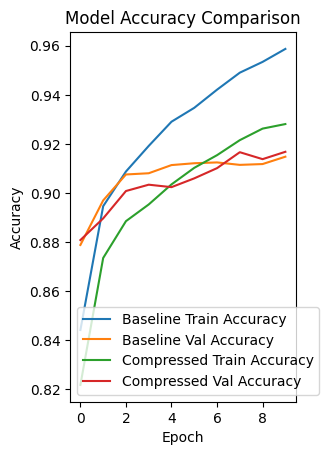

In [30]:
# This is the first plot for model accuracy.
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['accuracy'], label='Baseline Train Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Val Accuracy')
plt.plot(compressed_history.history['accuracy'], label='Compressed Train Accuracy')
plt.plot(compressed_history.history['val_accuracy'], label='Compressed Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

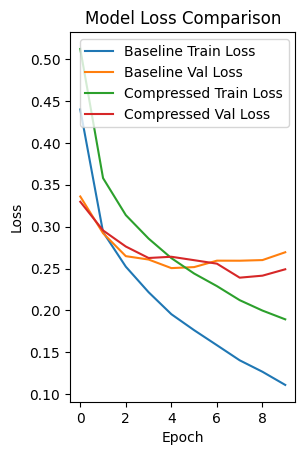

In [31]:
# This is the second plot for model loss.
plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['loss'], label='Baseline Train Loss')
plt.plot(baseline_history.history['val_loss'], label='Baseline Val Loss')
plt.plot(compressed_history.history['loss'], label='Compressed Train Loss')
plt.plot(compressed_history.history['val_loss'], label='Compressed Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [32]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [33]:
# First, I need to get my model's predictions on the test data.
y_pred_probs = compressed_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1) # I'm taking the class with the highest probability.
y_true = np.argmax(y_test, axis=1) # I'm getting the true labels in the same format.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [34]:
# Now I'm calculating the confusion matrix.
cm = confusion_matrix(y_true, y_pred)
# I'm defining the names for my 10 classes to make the plot readable.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

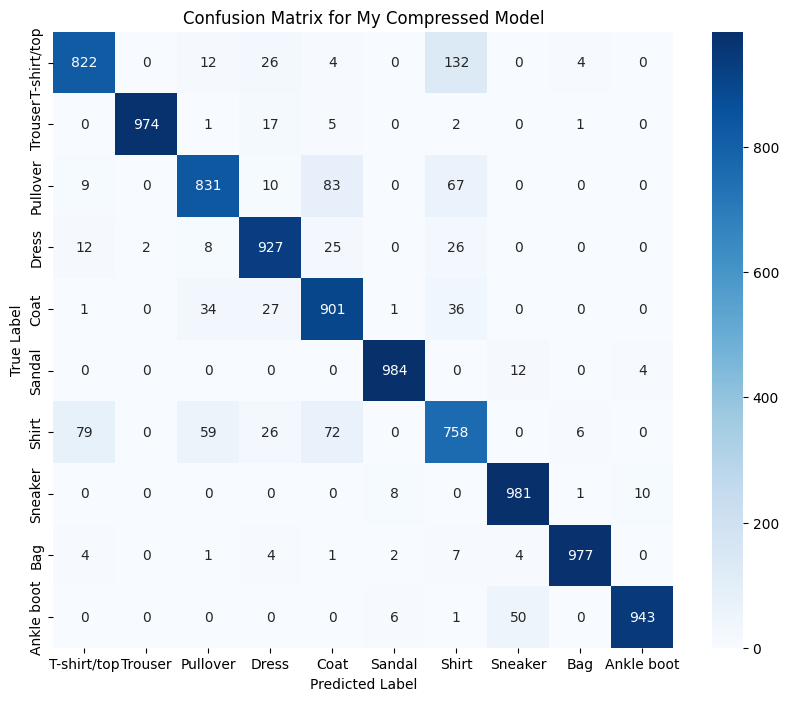

In [35]:
# I'm using seaborn to create a nice-looking heatmap of the confusion matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for My Compressed Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()